# ADULT INCOME ANN PRACTICE

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import category_encoders as ce
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-09-21 11:19:10.451200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-21 11:19:10.478563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-21 11:19:10.488431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-21 11:19:10.505139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-21 11:19:12.319093: W tensorflow/compiler/tf2

In [2]:
names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
df = pd.read_csv('adult_data.csv',header = None,names = names,na_values = '?',skipinitialspace = True )
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [30]:
for col in df:
    print(col,df[col].unique(),df[col].nunique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 73
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 8
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302] 21648
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 16
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 16
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 7
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support

In [4]:
df[df.duplicated]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [5]:
df = df.drop_duplicates(keep='first')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df = df.reset_index(drop=True)
df.shape

(32537, 15)

In [10]:
df = df.drop(columns = ['capital-gain','capital-loss'],axis = 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [11]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [35]:
# df = df.dropna()
# df.shape

In [12]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
y = (df['income'] == '>50k').astype(int)
X = df.drop('income',axis = 1)   

In [15]:
numeric_cols = ['age', 'fnlwgt', 'education-num','hours-per-week'] 
low_card_cat = ['relationship','race','sex']      
high_card_cat = ['workclass','education','marital-status','occupation','native-country']

In [16]:
for x in high_card_cat:
    print(x,' has',df[x].nunique(),' categories')

workclass  has 8  categories
education  has 16  categories
marital-status  has 7  categories
occupation  has 14  categories
native-country  has 41  categories


In [20]:
for x in high_card_cat:
    print(x,' has',df[x].nunique(),df[x].unique(),' categories')

workclass  has 8 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']  categories
education  has 16 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']  categories
marital-status  has 7 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']  categories
occupation  has 14 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']  categories
native-country  has 41 ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy'
 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan'
 '

In [17]:
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numeric_cols])

In [18]:
ohe = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore')
X_low_cat = ohe.fit_transform(X[low_card_cat])

In [19]:
encoder = ce.TargetEncoder(cols = high_card_cat)
X_high_cat = encoder.fit_transform(X[high_card_cat],y).values

In [21]:
#combine all
X_final = np.hstack([X_num,X_low_cat,X_high_cat])

X_train,X_test,y_train,y_test = train_test_split(X_final,y,random_state =42 ,test_size = 0.2)

In [22]:
# model
X_final.shape

(32537, 22)

In [25]:
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(X_final.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 5,batch_size = 64,verbose = 1)

Epoch 1/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 8.4465e-07 - val_accuracy: 1.0000 - val_loss: 3.0892e-11
Epoch 2/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.3007e-07 - val_accuracy: 1.0000 - val_loss: 1.6576e-11
Epoch 3/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.3616e-07 - val_accuracy: 1.0000 - val_loss: 1.0088e-11
Epoch 4/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.5657e-07 - val_accuracy: 1.0000 - val_loss: 5.9607e-12
Epoch 5/5
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.4416e-07 - val_accuracy: 1.0000 - val_loss: 3.5597e-12


In [33]:
#evaluate 
scores = model.evaluate(X_train,y_train)
print(model.metrics_names)
print(model.metrics_names[1] ,scores[1]*100)
print(scores)

814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.7541e-12
['loss', 'compile_metrics']
compile_metrics 100.0
[3.8941072588727366e-12, 1.0]


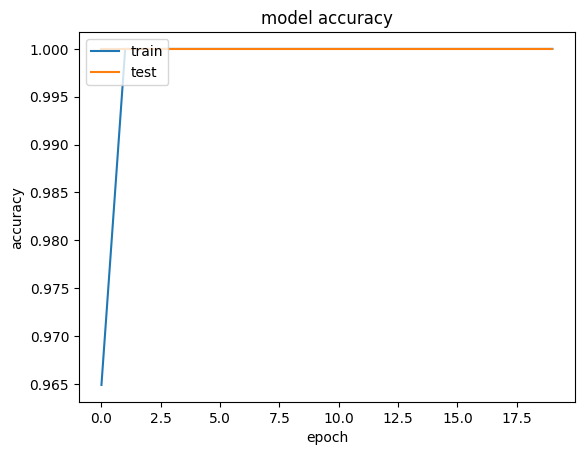

In [28]:
#summarize
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

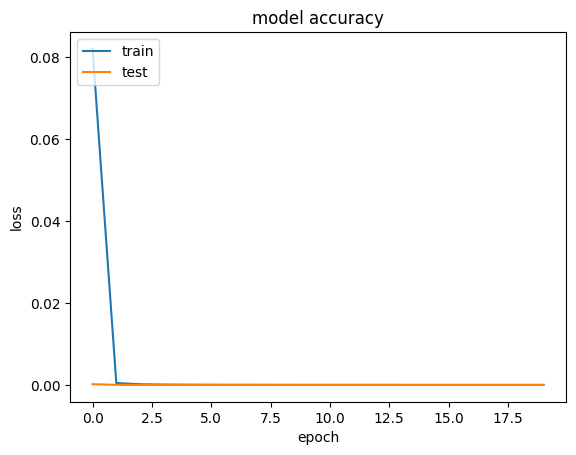

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

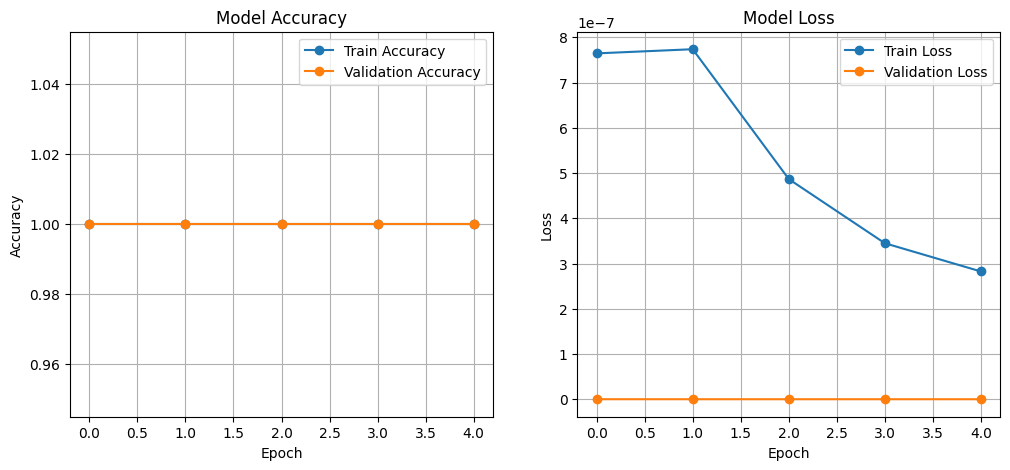

In [34]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Call the function
plot_training_history(history)


# TEXT PRE PROCESSING

In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/rgukt/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### convert to lower case

In [12]:
text = "Congratulations! You've won $1000 in cash.Call me now!, The time is very short"
text

"Congratulations! You've won $1000 in cash.Call me now!, The time is very short"

In [13]:
text = text.lower()
text

"congratulations! you've won $1000 in cash.call me now!, the time is very short"

### remove punctuation

In [14]:
import string
text = text.translate(str.maketrans('','',string.punctuation))
text

'congratulations youve won 1000 in cashcall me now the time is very short'

### remove digits

In [15]:
import re
text = re.sub(r'\d+','',text)
text

'congratulations youve won  in cashcall me now the time is very short'

### split

In [16]:
text.split()

['congratulations',
 'youve',
 'won',
 'in',
 'cashcall',
 'me',
 'now',
 'the',
 'time',
 'is',
 'very',
 'short']

### convert text word tokens

In [17]:
from nltk.tokenize import word_tokenize

#text = "Congratulations! You've won $1000 in cash.Call me now!, The time is very short"
tokens = word_tokenize(text)
tokens,len(tokens)

(['congratulations',
  'youve',
  'won',
  'in',
  'cashcall',
  'me',
  'now',
  'the',
  'time',
  'is',
  'very',
  'short'],
 12)

### remove stopwords

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rgukt/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(len(stop_words))
print(stop_words)

198
{'before', 'but', "i'll", 'whom', 'only', 'or', 'because', 'these', 'shouldn', 'further', 'so', 'wouldn', 'a', 'ain', 'he', 'has', 'she', 'shan', "don't", 'not', "needn't", "we've", 'the', 'after', 'be', 'herself', 'all', 's', 'himself', 'an', 'such', 'from', "wasn't", 'to', "weren't", 'when', 'i', 'off', "hasn't", 'my', 'haven', 'few', 'where', 'nor', "they'd", "he'll", 'was', "didn't", 'themselves', 'ours', 'and', "mightn't", 'those', 'there', 'for', 'each', "he'd", 'its', 'which', 'myself', "it'll", 'most', 'can', 'here', "shan't", "i'd", 'isn', 'having', 'yours', "she'd", "she's", 'do', 'her', 'just', "they've", "it's", 'wasn', 'ma', "i'm", 'ourselves', 'through', 'couldn', 'our', 'same', 'up', 'under', "aren't", 'own', 'both', "wouldn't", 'will', 'does', 'who', 'hasn', 'doing', 'what', "we're", 'about', 'in', 'didn', 'of', 'have', 'into', 'should', 'y', 'any', "hadn't", "we'd", 'theirs', 'they', 're', "you'll", "won't", "doesn't", 'hers', 'won', 'your', 'on', "we'll", 'than', 

In [25]:
filtered_tokens = [word for word in tokens if word not in stop_words]
filtered_tokens

['congratulations', 'youve', 'cashcall', 'time', 'short']

### stemming & lemmatization

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/rgukt/nltk_data...


True

In [29]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]
lemmatized

['congratulation', 'youve', 'cashcall', 'time', 'short']

In [30]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(word) for word in filtered_tokens] 
stemmed

['congratul', 'youv', 'cashcal', 'time', 'short']

### join lemmatized tokens

In [32]:
clean_text = ' '.join(lemmatized)
clean_text

'congratulation youve cashcall time short'

## Apple WordCloud

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import re

In [2]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/rgukt/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rgukt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
book = pd.read_csv('apple.txt',on_bad_lines = 'skip')
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [5]:
len(book)

40

### extract all reviews in a list

In [6]:
[i for i in book.x]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n            ",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you m

### text preprocess

In [7]:
text = ''
for i in range(len(book)):
    str = book['x'][i].strip() #remove empty spaces

    #1.lower case
    str = str.lower()

    #2.remove punctuation
    str = str.translate(str.maketrans('','',string.punctuation))

    #3.remove numbers
    str = re.sub(r'\d+','',str)
    text = text + str
    
#4.tokenize
text = word_tokenize(text)
print(text)

['its', 'amazing', 'battery', 'last', 'around', 'hrsbest', 'laptop', 'for', 'students', 'and', 'codersfinally', 'a', 'macbook', 'possession', 'got', 'it', 'in', 'k', 'in', 'diwali', 'sale', 'technically', 'good', 'laptopgood', 'newsluxury', 'product', 'niche', 'technology', 'good', 'battery', 'life', 'reliable', 'machine', 'other', 'laptops', 'crash', 'and', 'become', 'defunct', 'in', 'years', 'no', 'antivirus', 'required', 'security', 'of', 'data', 'and', 'transactions', 'much', 'better', 'terrific', 'sense', 'of', 'possession', 'pridebad', 'news', 'problems', 'will', 'be', 'there', 'if', 'you', 'are', 'switching', 'from', 'windows', 'based', 'system', 'very', 'less', 'space', 'in', 'hard', 'disk', 'no', 'cd', 'drive', 'inability', 'to', 'transfer', 'data', 'from', 'mac', 'to', 'your', 'existing', 'external', 'hard', 'disc', 'unless', 'you', 'format', 'it', 'apps', 'are', 'mostly', 'paid', 'and', 're', 'unreasonably', 'expensive', 'no', 'free', 'apps', 'which', 'are', 'available', 'ot

In [8]:
#5.remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in text if word not in stop_words]

cleaned_text = " ".join(filtered_tokens)
cleaned_text

'amazing battery last around hrsbest laptop students codersfinally macbook possession got k diwali sale technically good laptopgood newsluxury product niche technology good battery life reliable machine laptops crash become defunct years antivirus required security data transactions much better terrific sense possession pridebad news problems switching windows based system less space hard disk cd drive inability transfer data mac existing external hard disc unless format apps mostly paid unreasonably expensive free apps available otherwise google play store even angry bird costs rs printers compatible eg economical mfd laser printer ricoh sp cant used huge compatibility issues pages ms word keynote powerpoint unless master working still mostly document slides either open windows environment distortion issues need spend extra external cd writer tp buy carry bag mac con connected projectors unless buy connectors expensive theres clarity one buy cant connect tv ports different theres clar

In [9]:
len(filtered_tokens)

1821

In [ ]:
# sudo apt update
# sudo apt install fonts-dejavu-core

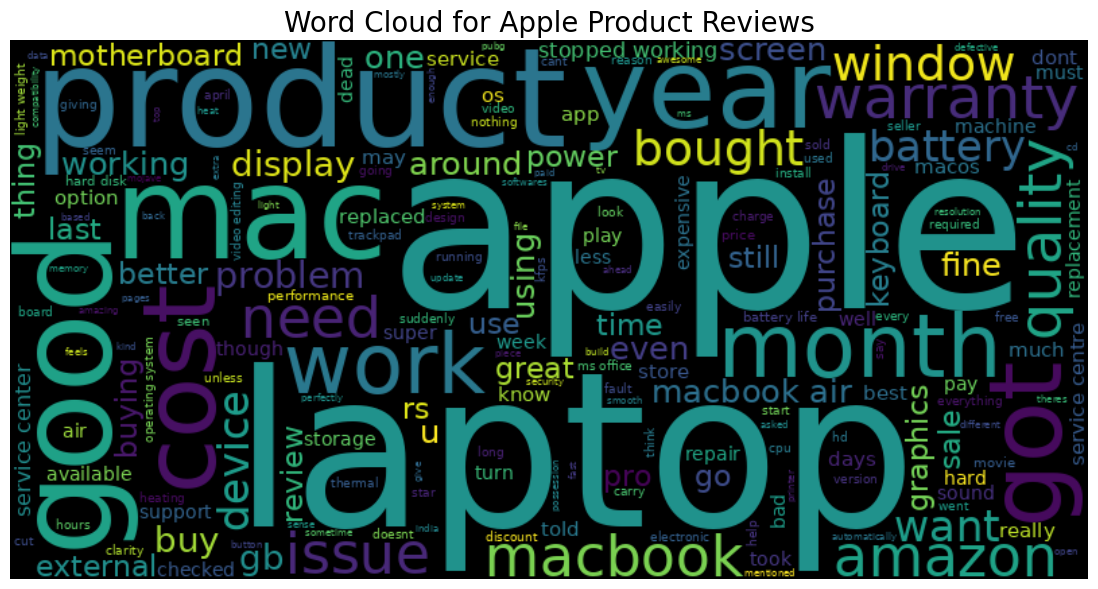

In [12]:
#6.generate word cloud
# Specify a TrueType font path
font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'

wordcloud = WordCloud(width=800,height=400,background_color='black',font_path=font_path).generate(cleaned_text)

#display
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Apple Product Reviews", fontsize=20)
plt.show()

# TEXT VECTORIZER

In [14]:
reviews = [
    "The product is great and easy to use",
    "Easy to use and very effective",
    "Not great,the product break very quickly",
    "Very bad experience, not recommneded"
] 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# initialize vector
vectorizer = CountVectorizer()

# transform reviews to count vectors 
X = vectorizer.fit_transform(reviews)

# get vocabulary
vocab = vectorizer.get_feature_names_out()
print(vocab)
len(vocab)

['and' 'bad' 'break' 'easy' 'effective' 'experience' 'great' 'is' 'not'
 'product' 'quickly' 'recommneded' 'the' 'to' 'use' 'very']


16

In [22]:
# initialize vector
vectorizer = CountVectorizer(stop_words = 'english')

# transform reviews to count vectors 
X = vectorizer.fit_transform(reviews)

# get vocabulary
vocab = vectorizer.get_feature_names_out()
print(vocab)
len(vocab)

['bad' 'break' 'easy' 'effective' 'experience' 'great' 'product' 'quickly'
 'recommneded' 'use']


10

In [23]:
print(X.toarray())

[[0 0 1 0 0 1 1 0 0 1]
 [0 0 1 1 0 0 0 0 0 1]
 [0 1 0 0 0 1 1 1 0 0]
 [1 0 0 0 1 0 0 0 1 0]]


In [24]:
# create dataframe
df = pd.DataFrame(X.toarray(),columns =vectorizer.get_feature_names_out(), index = [f"Review{i+1}" for i in range(len(reviews))] )
df

,bad,break,easy,effective,experience,great,product,quickly,recommneded,use
Review1,0,0,1,0,0,1,1,0,0,1
Review2,0,0,1,1,0,0,0,0,0,1
Review3,0,1,0,0,0,1,1,1,0,0
Review4,1,0,0,0,1,0,0,0,1,0


## bigram

In [28]:
vectorizer = CountVectorizer(ngram_range = (1,2),stop_words='english')
X = vectorizer.fit_transform(reviews)
print(X.toarray())
len(vectorizer.get_feature_names_out())

[[0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0]
 [1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]]


19

In [29]:
vectorizer.get_feature_names_out()

array(['bad', 'bad experience', 'break', 'break quickly', 'easy',
       'easy use', 'effective', 'experience', 'experience recommneded',
       'great', 'great easy', 'great product', 'product', 'product break',
       'product great', 'quickly', 'recommneded', 'use', 'use effective'],
      dtype=object)

In [30]:
df = pd.DataFrame(X.toarray(),columns =vectorizer.get_feature_names_out(), index = [f"Review{i+1}" for i in range(len(reviews))] )
df

,bad,bad experience,break,break quickly,easy,easy use,effective,experience,experience recommneded,great,great easy,great product,product,product break,product great,quickly,recommneded,use,use effective
Review1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0
Review2,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1
Review3,0,0,1,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0
Review4,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0


## tri gram

In [32]:
vectorizer = CountVectorizer(ngram_range = (1,3),stop_words='english')
X = vectorizer.fit_transform(reviews)
print(X.toarray())
len(vectorizer.get_feature_names_out())

[[0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0]
 [0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0]
 [1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


25

In [33]:
df = pd.DataFrame(X.toarray(),columns =vectorizer.get_feature_names_out(), index = [f"Review{i+1}" for i in range(len(reviews))] )
df

,bad,bad experience,bad experience recommneded,break,break quickly,easy,easy use,easy use effective,effective,experience,...,great product break,product,product break,product break quickly,product great,product great easy,quickly,recommneded,use,use effective
Review1,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
Review2,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1
Review3,0,0,0,1,1,0,0,0,0,0,...,1,1,1,1,0,0,1,0,0,0
Review4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Text Vectorization using TfidfVectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(reviews)
print(X.toarray())
print(vectorizer.get_feature_names_out())
len(vectorizer.get_feature_names_out())

[[0.         0.         0.5        0.         0.         0.5
  0.5        0.         0.         0.5       ]
 [0.         0.         0.52640543 0.66767854 0.         0.
  0.         0.         0.         0.52640543]
 [0.         0.55528266 0.         0.         0.         0.43779123
  0.43779123 0.55528266 0.         0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.         0.         0.57735027 0.        ]]
['bad' 'break' 'easy' 'effective' 'experience' 'great' 'product' 'quickly'
 'recommneded' 'use']


10

In [37]:
df = pd.DataFrame(X.toarray(),columns =vectorizer.get_feature_names_out(), index = [f"Review{i+1}" for i in range(len(reviews))] )
df

,bad,break,easy,effective,experience,great,product,quickly,recommneded,use
Review1,0.00000,0.000000,0.500000,0.000000,0.00000,0.500000,0.500000,0.000000,0.00000,0.500000
Review2,0.00000,0.000000,0.526405,0.667679,0.00000,0.000000,0.000000,0.000000,0.00000,0.526405
Review3,0.00000,0.555283,0.000000,0.000000,0.00000,0.437791,0.437791,0.555283,0.00000,0.000000
Review4,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000


# Emotion Mining

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
import string
import nltk
from matplotlib import pyplot as plt

In [17]:
afinn = pd.read_csv('Afinn.csv',sep = ',',encoding = 'latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [18]:
afinn[afinn['value'] >=5]

,word,value
315,breathtaking,5
1226,hurrah,5
1648,outstanding,5
2179,superb,5
2234,thrilled,5


In [19]:
afinn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2477 non-null   object
 1   value   2477 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.8+ KB


In [20]:
afinn[afinn.duplicated]

,word,value


In [25]:
book = pd.read_csv('apple.txt',on_bad_lines = 'skip',encoding="latin1")
book

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [26]:
[each for each in book.x]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n            ",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you m

In [27]:
# df to dictionary
sentiment_lexicon = afinn.set_index('word')['value'].to_dict()
sentiment_lexicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")
def calculate_sentiment(text:str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score  += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [29]:
# sample data
exstring = "I  am excited and thrilled, very happy to purchase apple macbook"
calculate_sentiment(exstring)

6

In [30]:
exstring1 = "I am really feeling sad for buying this product,it is not working on the second day itself  "
calculate_sentiment(exstring1)

-2

In [32]:
book['sentiment_value'] = book['x'].apply(calculate_sentiment)
book

,x,sentiment_value
0,It's amazing..... battery last around 10 -12 h...,7
1,Finally a MacBook possession. Got it in 50k in...,1
2,Best Laptop under 60k. If you don't want any a...,10
3,Pros:1. Light weight and super fast response t...,15
4,"""",0
5,I am very upset about the product as I checked...,-7
6,Reason for 1 star is I ot an defective piece. ...,9
7,Got the Apple Macbook air on amazon discount s...,6
8,White line coming on screen in just three mont...,-1
9,"Bought this product recently on 5 April, was w...",2
